# Step3 演習01 ロジスティック回帰の基礎
---

Step3 演習01では、教師あり学習の一種である離散値を予測するロジスティック回帰を実装します。

ロジスティック回帰は「教師あり学習」です。

与えられた特徴データ  $x$  に対し、それが何を意味しているのかを表す答えとなる正解（ラベル） $y$  が用意されています。

例えば、ある製品試験に不合格だった個数[個]に対し、そのときの工場が「正常稼働していたか」・「異常稼働していたか」という離散値を予測するときに利用される機械学習の一つです。

線形回帰との違いを意識しながら演習を進めるようにしましょう。

** はじめに **

* for文やwhile文の利用は明示的な利用指示がない場所での使用は避けてください。

** 本演習の目的 **

* 線形回帰との違いを意識しながらロジスティック回帰の実装をする。
* 分類問題の実装を体験する。

## ライブラリのインポート

まずはじめに、利用するライブラリのインポートを行います。

- [Numpy](http://www.numpy.org/)　数値計算を行うための基本パッケージの公式ドキュメント
- [Matplotlib](https://matplotlib.org/)　グラフ描画ライブラリの基本パッケージの公式ドキュメント

ドキュメントには有用な情報が書き記されています。何か迷ったときには必ずドキュメントに戻ってくるようにしましょう。

次のセルをそのまま実行（"SHIFT" + "ENTER"）してください。コードが書いてあるセルは**上から順番**に順次実行してください。

** 注意：** 初めてmatplotlibを使うユーザーは、フォント一覧のキャッシュが存在しないため、このセルの実行でWarningが出ます。もう一度実行すると、すでにキャッシュができているので、Warningなく走ります。

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
font = {'family':'IPAexGothic'}
plt.rc('font', **font)

## 訓練データセットの準備

製品試験で不合格だった製品の個数から、その製品を製造した工場が「正常稼働」か「異常稼働」を判断する分類問題に取り組みます。

ここでは以下のようなデータセット$X$, $y$を用います。

- $X$は製品試験に不合格だった製品の個数
- $y$は製品を製造した工場が「正常稼働」か「異常稼働」かを示すラベル

まず$X$のデータセットを用意しましょう。$X$は「関数np.arange(a, b, c)」を使って用意します。この関数は、aからbまでの数字（ただしbは含まない）をc刻みで生成し、それらを要素とする配列を生成します。<br>

例）np.arange(1, 6, 2)は[1, 3, 5]を生成

In [3]:
# 分類問題のデータセットXを作成
m = 22 # 不合格だった個数の最大数
X = np.arange(0, m, 1) # 0からm-1個の不合格だった個数を生成

Xがどのように生成されたか確認して見ましょう：

In [4]:
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

次に、製品を製造した工場が「正常稼働」か「異常稼働」かを示すラベルのデータセット$y$を用意します。ラベルが「0」の場合は正常、「1」の場合は異常とします。

- ０：正常
- １：異常

データセット$y$は「関数np.where(condition, a, b)」を使って用意します。この関数は、はNumPy配列を含む条件conditionが成立してれば「a」、成立していなければbを要素とする配列を生成します。具体的には以下の通りです<br>

例）下記のコードは配列[20, 10, 20, 10]を生成します。「x == 2」のところに「10」、それ以外のところに「20」を要素とする配列を生成するのからです。<br>
x = np.array([1, 2, 3, 2])<br>
np.where(x == 2, 10, 20)<br>

以下のコードで、Xの値が10より大きい（つまり、不合格となった製品の個数が10より大きい）場合は「1」というラベル、それ以外は「0」というラベルになるようなデータセットを用意しましょう。

In [5]:
# 分類問題のデータセットy（正解ラベル）を作成
y = np.where(X > 10, 1, 0)

$y$の中身を確認しましょう。

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## データの可視化

可視化は大切です。逐一可視化していきましょう。

- 横（x）軸は 製品試験に不合格だった製品の個数
- 縦（y）軸は「正常 ０・ 異常 １」の２クラス

ここでは、製品試験に不合格だった製品の個数に対して、その製品を製造した工場が**正常稼働**なのか**異常稼働**なのかを判断したい（分類したい）ということが目標です。

下のセルを実行してください。

In [7]:
def plotData(X,y):
    ytick = np.array(['正常 ０', '異常 １'])#目盛りのラベルの名前を指定（文字列）
    plt.yticks([0,1] ,ytick, fontsize=14)#y軸の目盛りにラベルを表示
    plt.xlabel('ある製品試験に不合格だった個数[個] ',fontsize=14) #x軸のラベル
    plt.title('製品試験と工場（正常・異常）の関係', fontsize=16) #グラフのタイトル
    plt.scatter(X[:11] ,y[:11], c='b') #散布図
    plt.scatter(X[11:] ,y[11:], c='r') #散布図
    plt.show() #グラフを表示

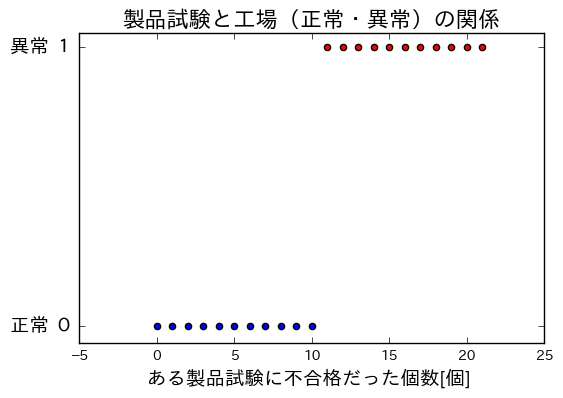

In [8]:
plotData(X,y)

このグラフからも分かるように、製品試験に不合格だった製品の個数がおよそ10個かどうかということが、工場が正常稼働なのか異常稼働なのかを判断すべき境目（境界線）であることが分かります。

## 線形回帰

この問題は工場の稼働を「正常・異常」の２クラスに分類する問題ですが、Step2で学習した線形回帰でこの問題を解けるかどうか試して見ましょう。つまり、製品試験に不合格だった製品の個数がおよそ10個のところに境界線を引けるかどうかとうことです。もしそのようなことが可能であれば、線形回帰でもこの問題を解けることになります。

### 目的関数

線形回帰を行うには目的関数（コスト関数）を定義する必要があります。<br>
Step2で学習した線形回帰の目的関数$J(\theta_0, \theta_1)$は、以下のようなものでした。

$$J(\theta_0, \theta_1) = \frac{1}{2m}\sum^{m}_{i=1}(h_{\boldsymbol{\theta}}(x^{(i)})-y^{(i)})^2$$

また、仮説$h_{\boldsymbol{\theta}}(x)$は、

$$h_{\boldsymbol{\theta}}(x)=\theta_0+\theta_1x$$

であるとしました。

#### パラメータの準備と初期化

まずはじめに、これから求める（これから学習する）2つのパラメータ $\theta_0$と$\theta_1$を初期化します。

Step2では複数のパラメータを配列でひとまとめにして扱えることを学びました。ここでは、2つのパラメータをNumPy の zeros() を使って２行１列の配列（行列）として用意します。

下のセルを実行してください。

In [9]:
theta = np.zeros([2,1])

thetaの中身を確認してみましょう。この配列には2つの値（両方ともゼロ）が格納されていることが分かります。

In [10]:
theta

array([[0.],
       [0.]])

#### 仮説hを実装
パラメータが準備できれば、それを用いて仮説hを実装できます。

** 【課題１】 ** パラメータが準備できたので、仮説 $h_{\boldsymbol{\theta}}(x)$ を計算する関数hypothesis(X, theta)を実装しましょう。

** Note：**

- $x$：入力データ
- $\theta$：パラメータ
- $h_{\boldsymbol{\theta}}(x)$：仮説

仮説は次のように定義しました。

$$h_{\boldsymbol{\theta}}(x)=\theta_0+\theta_1x$$

**ヒント：** プログラムを記述する際は、上記の式の$\theta_0$ は theta[0]　に対応し、$\theta_1$ は theta[1]　に対応していることに気づけば簡単です。

In [11]:
theta[0,0]

0.0

In [12]:
#Coursemale-02 Step3 QuestionNumber1 6bbb53dc3549befbd465dc38def2f94d
def hypothesis(X, theta):
###############ここを穴埋めしてください###############
    h = theta[0,0] + theta[1,0] * X
######################################################
    return h

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [13]:
%%bash
./validation_client.py male-02 3 1 Step3_01.ipynb api.internal.zero2one.jp 25456f87c8f04725a65d

Congraturation!
We give you 10 points out of 10 points.



いま定義した仮説 hypothesis に入力データ $x$ と初期化した theta を渡し、実行してみましょう。

In [14]:
h = hypothesis(X, theta)
print(h)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


「パラメータを初期化」で パラメータを格納している配列 thetaの各要素の値は0で初期化したため「$0+0\times{x}$」 となり、hypothesis が返す配列の要素はすべて0になることが確認できるはずです。

#### 目的関数（コスト関数）を実装
仮説hが実装できれば、それを使って目的関数（コスト関数）を実装できます。

** 【課題２】 **目的関数の値を計算する関数 computeCost(h, y) を実装してください。

** Note：**

- $h$：仮説（課題１で実装）
- $y$：正解ラベル

線形回帰の目的関数：
$$J(\theta_0, \theta_1) = \frac{1}{2m}\sum^{m}_{i=1}(h_{\boldsymbol{\theta}}(x^{(i)})-y^{(i)})^2$$

**ヒント：** 総和（シグマ）を実装するときは関数np.sum()を利用すると便利です。また、$a^{b}$は「a**b」と記述できます。

In [15]:
#Coursemale-02 Step3 QuestionNumber2 bf13678da897b50323d666d68d5375ed
def computeCost(h, y):
    m = y.shape[0]
###############ここを穴埋めしてください###############
    J = (1/(2*m))*np.sum(((h - y) ** 2))
######################################################
    return J

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [16]:
%%bash
./validation_client.py male-02 3 2 Step3_01.ipynb api.internal.zero2one.jp

Congraturation!
We give you 10 points out of 10 points.



初期のパラメータ$\theta$に対してのコストを出力してみましょう。下のセルを実行してください。

In [17]:
computeCost(h, y)

0.25

## パラメータの更新（学習）の式を実装する
### 最急降下法

復習の意味も兼ねて、Step2の演習で実装した最急降下法を思い出しながら進めていきましょう。

最急降下法を用いてパラメータを更新する式は以下のように記述できます。最急降下法では、パラメータの値があまり変化しなくなるまでパラメータを更新し続ける処理を繰り返します（このプロセスを学習と呼びます）。以下の式中の $\alpha$  は学習率であり、パラメータの更新（学習）のスピードを調整します。
$$\theta_0 := \theta_0 - \alpha\frac{\partial}{\partial \theta_0}J(\theta_0, \theta_1)$$
$$\theta_1 := \theta_1 - \alpha\frac{\partial}{\partial \theta_1}J(\theta_0, \theta_1)$$
<br>
この式に線形回帰の目的関数$J(\theta_0, \theta_1)$を代入して微分してまとめると、次のようなシンプルな式になります。
$$\begin{align}\theta_0 &:= \theta_0 - \alpha\frac{1}{m}\sum_{i=1}^{m}(h_{\boldsymbol{\theta}}(x^{(i)})-y^{(i)}) \\
\theta_1 &:= \theta_1 - \alpha\frac{1}{m}\sum_{i=1}^{m}(h_{\boldsymbol{\theta}}(x^{(i)})-y^{(i)})x^{(i)}\end{align}$$

#### パラメータを更新する（学習を行う）関数を実装

** 【課題３】 **最急降下法を用いてパラメータ theta を更新する関数 update(X, y, h, theta, alpha) を実装し、更新後の theta を返す関数を実装してください。

** Note：**
- X：入力データ
- y：正解ラベル
- h：仮説
- theta：パラメータ
- alpha：学習率（=0.001）

**ヒント：** 総和（シグマ）を実装するときは関数np.sum()を利用すると便利です。2つのパラメータをまとめた theta を使って一発で計算しようとはせず、上記の式の通り、パラメータを theta[0] と theta[1] の2つに分けてそれぞれ個別に更新するようにすると直感的に実装できます。

In [18]:
#Coursemale-02 Step3 QuestionNumber3 9b84a0b692f97d2bf2cefe64ff3a8e7e
def update(X, y, h, theta, alpha):
    m = y.size #入力データの数
###############ここを穴埋めしてください###############
    theta[0] = theta[0] - (alpha /m)*np.sum(h - y)
    theta[1] = theta[1] - (alpha /m)*np.sum((h - y)*X)
######################################################
    return theta

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [19]:
%%bash
./validation_client.py male-02 3 3 Step3_01.ipynb api.internal.zero2one.jp

ExcessiveAccess: Wait for 10 minutes



パラメータを更新する（学習する）関数の実装に成功したら、実際に学習できているかどうか確認して見ましょう。

#### 学習結果を視覚的に確認する
パラメータに初期値を設定し、一度だけ学習した（更新した） theta の値を出力してみまましょう。下のセルを実行してください。

In [20]:
# 学習率
alpha=0.001

# パラメータの初期値
theta = np.zeros([2,1])

# パラメータの更新（学習）
theta = update(X, y, h, theta, alpha)

print(theta) # 結果を確認

[[0.0005]
 [0.008 ]]


このパラメータ$\theta$を使って仮説hをグラフ化してみることで、どの程度の学習ができているかどうかを視覚的に確認して見ましょう。下のセルを実行して見ましょう。

In [21]:
h = hypothesis(X, theta)

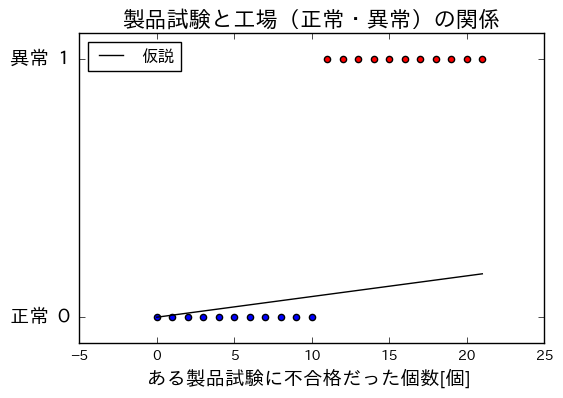

In [22]:
plt.title('製品試験と工場（正常・異常）の関係', fontsize=16) #グラフのタイトル
plt.xlabel('ある製品試験に不合格だった個数[個] ',fontsize=14) #x軸のラベル
plt.ylim([-0.1,1.1]) # y軸の幅
ytick = np.array(['正常 ０', '異常 １'])#目盛りのラベルの名前を指定（文字列）
plt.yticks([0,1], ytick, fontsize=14) #y軸の目盛りにラベルを表示
plt.scatter(X[:11], y[:11], c='b') #散布図
plt.scatter(X[11:], y[11:], c='r') #散布図
plt.plot(X, h, c='black', label = '仮説') #仮説
plt.legend(loc = 'upper left' ) #凡例
plt.show() 

分類問題を線形回帰を使って解こうとしているためかなり無理がありそうですが、もう少し学習を進めてみましょう。

#### 繰り返しパラメータを更新（学習）させるプログラムを完成させる

最急降下法では、一度の更新（学習）では不十分であるため、パラメータが更新される度に得られる新しい仮説を使って再びパラメータを更新（学習）するという処理を何度も繰り返すことで、目的関数（コスト関数）の値を小さくしていきます。つまり、下記のような処理を繰り返すことで仮説の精度を上げます。

仮説(最初の仮説)<br>
パラメータの更新<br>

仮説(新しい仮説)<br>
パラメータの更新<br>

仮説(新しい仮説)<br>
パラメータの更新<br>
・<br>
・<br>
・<br>


上記の「仮説」と「パラメータの更新」との間に「目的関数（コスト関数）」の計算を挟みその結果を記録しおくと、それを後でグラフ化することで、目的関数の値が下がっていること、つまり、コストが下がっていることを視覚的に確認できるので便利です。その場合、以下のような処理フローにすれば良いことになります。

仮説(最初の仮説)<br>
目的関数の計算して記録<br>
パラメータの更新<br>

仮説(新しい仮説)<br>
目的関数の計算して記録<br>
パラメータの更新<br>

仮説(新しい仮説)<br>
目的関数の計算して記録<br>
パラメータの更新<br>
・<br>
・<br>
・<br>


上記のように同じ処理を何度も繰りを返す場合は for文を使うと便利です。

for文と、これまでに実装してきた下記の関数を使って上記の処理フローを実装してみましょう。

- hypothesis()
- computeCost()
- update()

** 【課題４】 ** 学習を繰り返し行う gradientDescent(X, y, theta, iterations) を実装し、その結果更新された theta を返す関数を実装してください。

**Note1：関数の引数**<br>

- X：入力データ
- y：正解
- theta：更新前のパラメータ
- iterations：繰り返し回数

**Note2：関数の内部**<br>
- h：仮説
- J：目的関数
- theta：更新されたパラメータ

In [23]:
#Coursemale-02 Step3 QuestionNumber4 9294339ea5a2f7607f9607c1cb674633
def gradientDescent(X, y, theta, iterations):
    alpha = 0.001 #学習率
    for i in range(iterations):
###############ここを穴埋めしてください###############
        h = hypothesis(X, theta)
        J = computeCost(h, y)
        cost.append(J)
        theta = update(X, y, h, theta, alpha)
######################################################
    return theta

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [24]:
%%bash
./validation_client.py male-02 3 4 Step3_01.ipynb api.internal.zero2one.jp

Congraturation!
We give you 10 points out of 10 points.



下のセルを実行するとモデルの学習がはじまります。

今回は、繰り返し回数を10000回に指定しました。取り扱うデータやモデルによって必要な学習回数は変わります。

データ数が少ないため10000回の計算は数秒程度でおわります。

In [25]:
# 目的関数の計算結果を保持しておく配列
cost = []

# パラメータの初期値
theta = np.zeros([2,1])

# パラメータの更新（学習）
theta = gradientDescent(X, y, theta, iterations=100000)

print(theta) # 結果を確認

[[-0.2173913 ]
 [ 0.06832298]]


まずはじめに目的関数の出力である cost の値をプロットしてみて値が下がっているかどうか確認してみましょう。costの値が下がっていなければ問題があります。下のセルを実行してください。

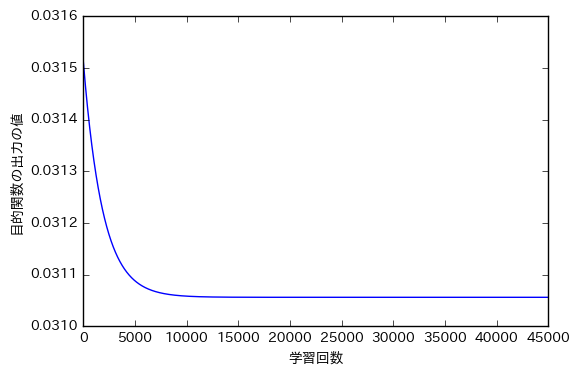

In [26]:
plt.plot(cost[5000:50000],c='b')
plt.xlabel('学習回数')
plt.ylabel('目的関数の出力の値')
plt.show()

このグラフから、パラメータの値はおよそ20000回ほどで収束していることがわかります。

学習結果を視覚的に確認するために、このパラメータ theta を使って仮説hをプロットしてみましょう。
最初にhypothesis(X, theta)を実行して仮説hを手に入れてからグラフ化します。

In [27]:
h = hypothesis(X, theta)

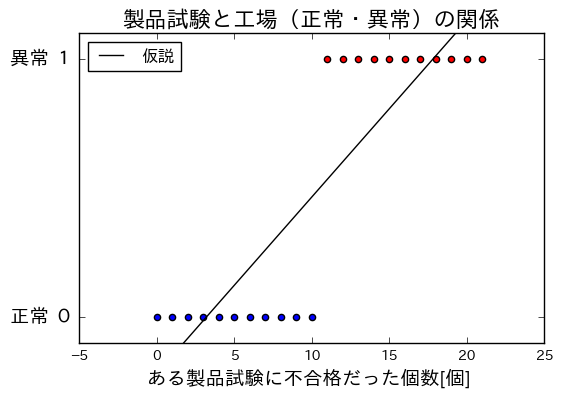

In [28]:
ytick = np.array(['正常 ０', '異常 １'])#目盛りのラベルの名前を指定（文字列）
plt.yticks([0,1] ,ytick, fontsize=14)
plt.ylim([-0.1,1.1]) # y軸の幅
plt.xlabel('ある製品試験に不合格だった個数[個] ',fontsize=14) #x軸のラベル
plt.title('製品試験と工場（正常・異常）の関係', fontsize=16) #グラフのタイトル
plt.scatter(X[:11] ,y[:11], c='b') #散布図
plt.scatter(X[11:] ,y[11:], c='r') #散布図
plt.plot(X ,h, c='black', label = '仮説') #仮説
plt.legend( loc = 'upper left' ) #凡例
plt.show()

講義でも紹介したグラフと似た結果を得ることができていると思います。

グラフをみるとわかる通り、$X$の値（不合格の個数）が「10個」の辺りで赤い点と青い点を分離する境界線を引けていないので、できちんと「正常・異常」を分類することができていません。

<div align="center"  style="width:55%">
<img src="./dataStep3/exam_plot_graph_.png"></div>

この状況はさらに訓練データ数を増やせば改善するのでしょうか？明らかに異常なデータをさらに追加してどうなるか確認してみましょう。

下のセルを実行してください。データの数を22個から45個に増やしてみます。

In [29]:
m = 45 # 不合格だった個数の最大数
X1 = np.arange(0, m, 1) # 0からm-1個の不合格だった個数を生成
y1 = np.where(X1 > 10, 1, 0) # 10より大きい場合は不合格「1」、それ以外は合格「0」

In [30]:
X1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [31]:
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

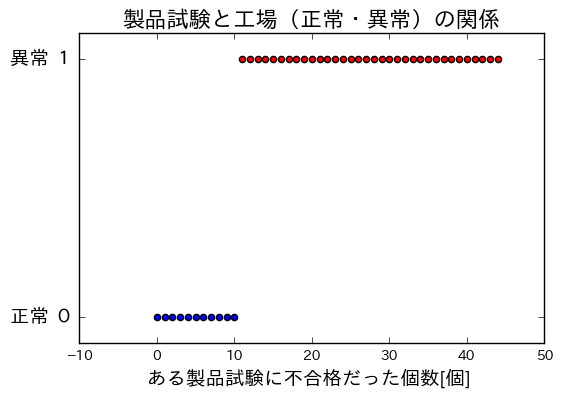

In [32]:
ytick = np.array(['正常 ０', '異常 １'])#目盛りのラベルの名前を指定（文字列）
plt.yticks([0,1], ytick, fontsize=14)
plt.ylim([-0.1, 1.1]) # y軸の幅
plt.xlabel('ある製品試験に不合格だった個数[個] ',fontsize=14) #x軸のラベル
plt.title('製品試験と工場（正常・異常）の関係', fontsize=16) #グラフのタイトル
plt.scatter(X1[:11], y1[:11], c='b') #散布図
plt.scatter(X1[11:], y1[11:], c='r') #散布図
plt.show()

異常なデータを追加したので、この訓練データを使って仮説hを求めて見ましょう。

下のセルをそのまま実行してください。

In [33]:
# 目的関数の計算結果を保持しておく配列
cost = []

# パラメータの初期値
theta1 = np.zeros([2,1])

# パラメータの更新（学習）
theta = gradientDescent(X1, y1, theta1, iterations=100000)

print(theta1) # 結果を確認

[[0.21352657]
 [0.02463768]]


In [34]:
h2 = hypothesis(X1, theta1)

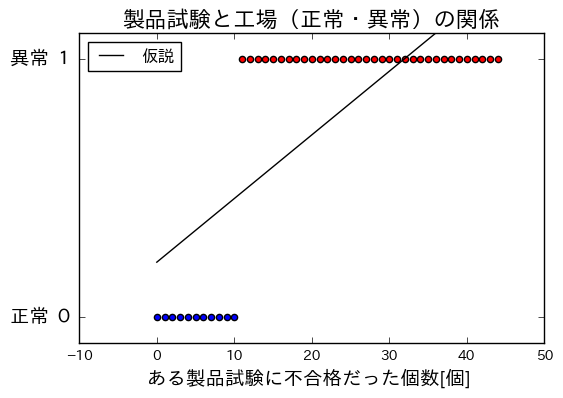

In [35]:
ytick = np.array(['正常 ０', '異常 １'])#目盛りのラベルの名前を指定（文字列）
plt.yticks([0,1], ytick, fontsize=14)
plt.ylim([-0.1, 1.1]) # y軸の幅
plt.xlabel('ある製品試験に不合格だった個数[個] ',fontsize=14) #x軸のラベル
plt.title('製品試験と工場（正常・異常）の関係', fontsize=16) #グラフのタイトル
plt.scatter(X1[:11], y1[:11], c='b') #散布図
plt.scatter(X1[11:], y1[11:], c='r') #散布図
plt.plot(X1, h2, c='black', label = '仮説') #仮説
plt.legend(loc = 'upper left'  ) #凡例
plt.show()

ここでは訓練データを増やして学習すれば状況が改善するかどうか試してみましたが、グラフから明らかなように、状況は改善するどころか益々悪化していることが分かります。

この結果は訓練データを増やす前から想像できたことと思います。なぜなら、ここで想定した仮説hを線形回帰を使って求めると、それはできる限り与えられたデータ点を代表するような線となるからです。

したがって、Step2の演習で学んだ線形回帰を使って分類問題を解くことは困難であることが分かります。

<div align="center"  style="width:75%">
<img src="./dataStep3/exam_plot_graph_50.png"></div>

## ロジスティック回帰

ロジスティック回帰は教師あり学習です。「犬か猫か」「正常か異常か」「右か左か」といった、分類問題を解くために利用されます（線形回帰も教師あり学習ですが、線形回帰は連続値を予測する問題に利用されます）。

ここでは、先ほど線形回帰を使って解こうとした分類問題、「製品試験で不合格だった製品の個数（個）から、その製品を製造した工場が「正常稼働」か「異常稼働」を判断する」という問題をロジスティック回帰を使って解く方法を学びます。

<div align="center"  style="width:55%">
<img src="./dataStep3/logistic_regression.png"></div>

### 訓練データセットの準備

改めて、以下のデータセット$X$, $y$を準備します。

- $X$は製品試験に不合格だった製品の個数
- $y$は製品を製造した工場が「正常稼働」か「異常稼働」かを示すラベル

下記のコードを実行してください。

In [36]:
# 分類問題のデータセットXを作成
m = 22 # 不合格だった個数の最大数
X = np.arange(0, m, 1) # 0からm-1個の不合格だった個数を生成

# 分類問題のデータセットy（正解ラベル）を作成
y = np.where(X > 10, 1, 0)

In [38]:
def plotData(X,y):
    ytick = np.array(['正常 ０', '異常 １'])#目盛りのラベルの名前を指定（文字列）
    plt.yticks([0, 1], ytick, fontsize=14)#y軸の目盛りにラベルを表示
    plt.xlabel('ある製品試験に不合格だった個数[個] ',fontsize=14) #x軸のラベル
    plt.title('製品試験と工場（正常・異常）の関係', fontsize=16) #グラフのタイトル
    plt.scatter(X[:11], y[:11], c='b') #散布図
    plt.scatter(X[11:], y[11:], c='r') #散布図
    plt.show() #グラフを表示

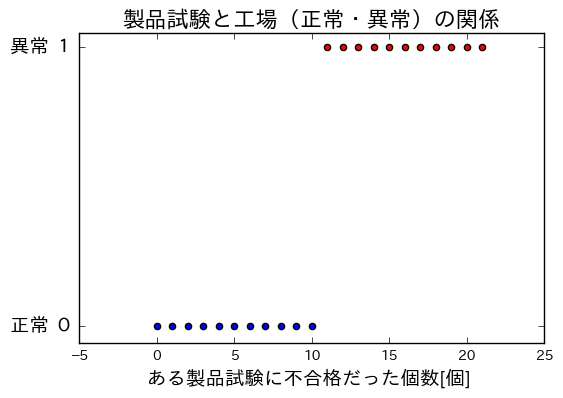

In [39]:
plotData(X, y)

### 目的関数

ロジスティック回帰を行うには目的関数（コスト関数）を定義する必要があります。<br>
ロジスティック回帰の目的関数$J(\boldsymbol{\theta})$は以下の通りです：

$$J(\boldsymbol{\theta}) = -\frac{1}{m}\sum^{m}_{i=1}\left(y^{(i)}\log(h_{\boldsymbol{\theta}}(\boldsymbol{x}^{(i)}))+(1-y^{(i)})\log(1-h_{\theta}(\boldsymbol{x}^{(i)}))\right)$$

ただし、仮説$h_{\boldsymbol{\theta}}(z)$はシグモイド関数
$$h_{\boldsymbol{\theta}}(z)=\frac{1}{1+e^{-z}}$$
ここで、
$$z=\theta_0+\theta_1x$$

#### パラメータの準備と初期化

この仮説にはパラメータが2つあるので配列としてまとめて初期化しましょう。関数np.zeros()を使って両方ともゼロで初期化します。

In [40]:
theta = np.zeros([2, 1])

In [41]:
theta

array([[0.],
       [0.]])

### 仮説hの実装（シグモイド関数の実装）

パラメータが準備できたので、ロジスティック回帰の仮説 $h_\theta{(x)}$ を実装できます。

ロジスティック回帰の仮説$h_{\boldsymbol{\theta}}(x)$はシグモイド関数です。

$$h_{\boldsymbol{\theta}}(x)=\frac{1}{1+e^{-\boldsymbol{\theta}^{\top}\boldsymbol{x}}}$$


ここで、$\boldsymbol{\theta}^{\top}\boldsymbol{x}$は線形回帰の仮説（${\theta}$と$x$の内積）ですが、これを下記のように $z$ と置くと、

$$z=\boldsymbol{\theta}^{\top}\boldsymbol{x}$$

次のように記述できます
$$sigmoid(z)=\frac{1}{1+e^{-z}}$$


** 【課題５】 ** 関数sigmoid(X, theta)を実装してください。


一般にパラメータ$\theta$の要素数は任意ですが、この課題では$\theta_0$と$\theta_1$の2つだけとし、$z$を次のように仮定します：

$$z=\theta_0+\theta_1x$$


**ヒント:** z は theta[1] と theta[0] を使って記述すると楽に実装できます。$e^{-z}$ の部分の実装は np.exp(-z) を用いて実装できます。

In [44]:
#Coursemale-02 Step3 QuestionNumber5 cda0fc3db4fec10f5f38bf3ef9d0d218
def sigmoid(X, theta):
###############ここを穴埋めしてください###############
    z = theta[0] + theta[1] * X
    h = 1/(1+np.exp(-z))
######################################################
    return h

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [45]:
%%bash
./validation_client.py male-02 3 5 Step3_01.ipynb api.internal.zero2one.jp

Congraturation!
We give you 10 points out of 10 points.



ここで定義した sigmoid関数 に入力データ $x$ とゼロで初期化した theta を渡して実行してみましょう。

In [46]:
h3 = sigmoid(X, theta)
h3

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

theta の要素はすべてゼロで初期化していたため、$z$ はすべてゼロとなり、その結果、分母にある指数計算の部分がすべて $e^0$ 、つまり、1になります。

$$sigmoid(0) = \frac{1}{1+e^{0}} = \frac{1}{1+1} = 0.5$$


zがゼロの場合はsigmoidの値が0.5になることが分かりました。一方、zが非常に大きな正の数である場合、分母の$e^{-z}$はほとんどゼロになるので、sigmoidの値は「1」に近づきます。また、zが非常に大きな負の数の場合、分母の分母の$e^{-z}$は非常に大きな数になるのでsigmoidの値は「0」に近づきます。つまり、sigmoidの値は0から1の間の値になります。

この様子をグラグ化して視覚的に確認して見ましょう。
下のセルを実行するとシグモイド関数のグラフが出力されます。

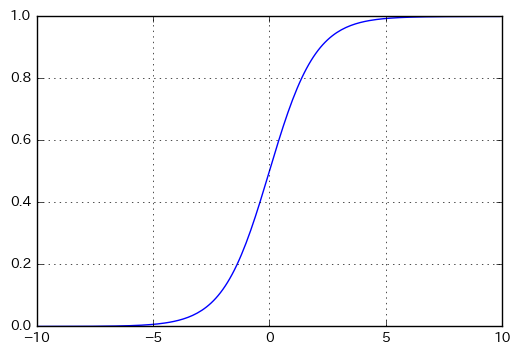

In [47]:
test_data = np.arange(-10,10,0.1)
test_h = 1 / (1 + np.exp(-test_data))
plt.plot(test_data, test_h)
plt.grid()
plt.show()

確率論ではある事象が起きる確率を0から1までの数値で表現しますが、sigmoidの値も0から1の間の値をとるため、ロジスティック回帰で利用する仮説hの値（つまりsigmoid関数の値）は問題となっている対象がある分類に属する確率として解釈されます。

### ロジスティック回帰の目的関数

ロジスティック回帰の仮説h（シグモイド関数）が実装できたので、ロジスティック回帰の目的関数を実装できます。

$J(\boldsymbol{\theta})$を、以下に示します。
$$J(\boldsymbol{\theta}) = -\frac{1}{m}\sum^{m}_{i=1}\left(y^{(i)}\log(h_{\boldsymbol{\theta}}(\boldsymbol{x}^{(i)}))+(1-y^{(i)})\log(1-h_{\theta}(\boldsymbol{x}^{(i)}))\right)$$

** 【課題６】 ** 目的関数 $J(\theta)$ を計算する関数computeCost_logi(h, y)を実装してください。

** Note：関数computeCost_log()の引数**

- $h$：仮説（課題5で実装したシグモイド関数）
- $y$：正解ラベル

**ヒント：** 上記の2つの引数（$h$と$y$）は与えられるので、これらは与えられたものとして関数の内部でそのまま利用します。総和（シグマ）は関数 np.sum()、$\log(x)$は関数 np.log()を用いて実装できます。

In [48]:
#Coursemale-02 Step3 QuestionNumber6 24c65b658dc941f868ae093dfd2b16ec
def computeCost_logi(h, y):
###############ここを穴埋めしてください###############
    m = y.shape[0]
    J = (-1/m)*np.sum(y * np.log(h) + (1 - y)*np.log(1 - h))
######################################################
    return J

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [49]:
%%bash
./validation_client.py male-02 3 6 Step3_01.ipynb api.internal.zero2one.jp

Congraturation!
We give you 10 points out of 10 points.



初期値をすべてゼロにパラメータ（theta）から求められる仮説hに対して、目的関数（コスト関数）の値がどうなるか確認してみましょう。

In [50]:
# パラメータの初期化
theta = np.zeros([2,1])

# ロジスティック回帰の仮説を計算
h = sigmoid(X, theta)

# 目的関数（コスト関数）の値を計算
computeCost_logi(h, y)

0.6931471805599453

### パラメータの更新（学習）の式を実装する
#### 最急降下法

最急降下法を用いてパラメータを更新する式は、ロジスティック回帰の場合も線形回帰の時と同じになります（下記）。

$$\begin{align}\theta_0 &:= \theta_0 - \alpha\frac{1}{m}\sum_{i=1}^{m}(h_{\boldsymbol{\theta}}(x^{(i)})-y^{(i)}) \\
\theta_1 &:= \theta_1 - \alpha\frac{1}{m}\sum_{i=1}^{m}(h_{\boldsymbol{\theta}}(x^{(i)})-y^{(i)})x^{(i)}\end{align}$$




この式中の α は学習率であり、パラメータの更新（学習）のスピードを調整します。

繰り返しになりますが、最急降下法では、パラメータの値があまり変化しなくなるまでパラメータを更新し続ける処理を繰り返します。線形回帰の時と同じように、「仮説」と「パラメータの更新」との間に「目的関数（コスト関数）」の計算を挟みその結果を記録するという処理を繰り返し行うよう実装にしましょう。そのようにしておくと、後で目的関数の値の変化をグラフ化して確認することができるからです。


仮説(最初の仮説)<br>
目的関数の計算して記録<br>
パラメータの更新<br>

仮説(新しい仮説)<br>
目的関数の計算して記録<br>
パラメータの更新<br>

仮説(新しい仮説)<br>
目的関数の計算して記録<br>
パラメータの更新<br>
・<br>
・<br>
・<br>

同じ処理を何度も繰りを返すので for文を利用して実装します。

** 【課題７】 ** 繰り返し学習を行う gradientDescent_logi(X, y, theta, iterations) を実装し、更新後の theta を返す関数を実装してください。

**Note1：**
関数gradientDescent_log()iの引数
- X：入力データ
- y：正解ラベル
- theta：更新前のパラメータ
- iterations：繰り返し回数

**Note2：**
関数gradientDescent_log()iの内部
- h：仮説：関数sigmoid(X, theta)を利用
- J：目的関数： 関数computeCost_logi(h, y)を利用
- theta：更新後のパラメータ（課題３で実装したパラメータを更新する関数update(X, y, h, theta, alpha)を利用）

In [52]:
#Coursemale-02 Step3 QuestionNumber7 0b99c313460e1d7a0d8068a3c98ad5be
def gradientDescent_logi(X, y, theta, iterations):
    alpha = 0.01 #学習率
    for i in range(iterations):
###############ここを穴埋めしてください###############
        # 仮説の計算
        h = sigmoid(X, theta)
        
        # 目的関数（コスト関数）の計算と記録
        J = computeCost_logi(h, y)
        cost.append(J)
        
        # 学習（パラメータの更新）
        theta = update(X, y, h, theta, alpha)
######################################################
    return theta

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [53]:
%%bash
./validation_client.py male-02 3 7 Step3_01.ipynb api.internal.zero2one.jp

Congraturation!
We give you 10 points out of 10 points.



下のセルを実行する学習が始まります。

今回は、繰り返し回数を300000回としました。取り扱うデータによって適切な必要な学習回数は変わります。まず適当な回数で学習をしてみて、目的関数の値の変化を視覚的に確認し、何回学習を繰り返すのが適当なのか決めることになるでしょう。

計算には数秒かかります。

In [54]:
# 目的関数（コスト関数）の計算結果を保持するための配列
cost = [] 

# パラメータを初期化
theta = np.zeros([2,1])

# 学習
theta = gradientDescent_logi(X, y, theta, iterations=300000)

配列costには目的関数（コスト関数）の計算結果が保持されますが、この配列に計算結果を書き込む処理は、関数gradientDescent_logi()の内部で行われています。関数gradientDescent_logi()の内部では、繰り返し学習が行われ、パラメータが更新されて新たな仮説が計算される度に目的関数の値を求めて配列costに記録しているわけです。

配列costに記録された目的関数（コスト関数）の値の変化をプロットし視覚的に確認してみましょう。目的関数（コスト関数）の値が、学習の度に減少する方向に変化していなければ何かしら問題があるということがすぐに分かります。

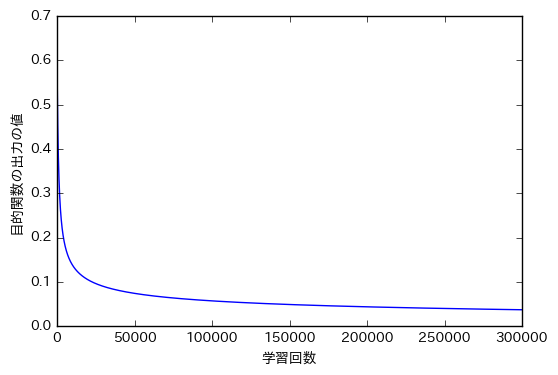

In [55]:
plt.plot(cost, c='b')
plt.xlabel('学習回数')
plt.ylabel('目的関数の出力の値')
plt.show()

目的関数（コスト関数）の値があまり変化しなくなる回数で学習を打ち切り、学習結果を視覚的に確認して見ましょう。

### 学習結果を視覚的に確認する
#### 仮説（シグモイド関数）の可視化

学習の結果得られたパラメータ theta を使って仮説hをプロットしてみましょう。

仮説$h_{\boldsymbol{\theta}}(x)$はシグモイド関数ですから、

$$h_{\boldsymbol{\theta}}(x)=\frac{1}{1+e^{-\boldsymbol{\theta}^{\top}\boldsymbol{x}}}$$



これは関数sigmoid(X, theta) のことですから、これをプロットすることで仮説hを視覚的に確認できます。

In [56]:
# 仮説（シグモイド関数）
h3 = sigmoid(X, theta)

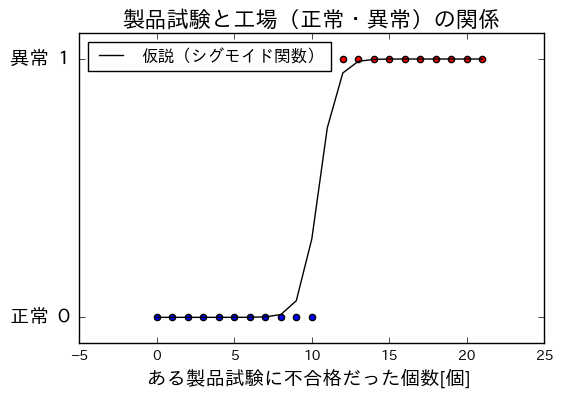

In [57]:
ytick = np.array(['正常 ０', '異常 １'])#目盛りのラベルの名前を指定（文字列）
plt.yticks([0, 1], ytick, fontsize=14)
plt.ylim([-0.1, 1.1]) # y軸の幅
plt.xlabel('ある製品試験に不合格だった個数[個] ',fontsize=14) #x軸のラベル
plt.title('製品試験と工場（正常・異常）の関係', fontsize=16) #グラフのタイトル
plt.scatter(X[:11], y[:11], c='b') #散布図
plt.scatter(X[11:], y[11:], c='r') #散布図
plt.plot(X, h3, c='black', label='仮説（シグモイド関数）') #仮説（シグモイド関数）
plt.legend(loc='upper left')
plt.show()

ロジスティック回帰の仮説は0から1の間の値を取るため、その値は確率とみなせます。

この例では、工業が異常な確率は不合格となった製品の個数が0個から7個までは仮説の値はほぼゼロですが、7個の辺りから急激に異常な値が大きくなり、10個のところで値が0.5（異常である確率50％）、13個辺りから先は値がほぼ1（異常である確率100%）になります。仮説の値はこのように確率として解釈するという利用方法あるわけです。

#### 決定境界の可視化

次に、シグモイド関数の分母にある指数関数の肩に乗っている以下の部分

$$z=\boldsymbol{\theta}^{\top}\boldsymbol{x}$$

をプロットして可視化して見ましょう。これは**決定境界**と呼ばれます。

これは関数hypothesis(X, theta)のことですから、これをプロットすることで決定境界を視覚的に確認できます。

In [58]:
#決定境界
h4 = hypothesis(X, theta)

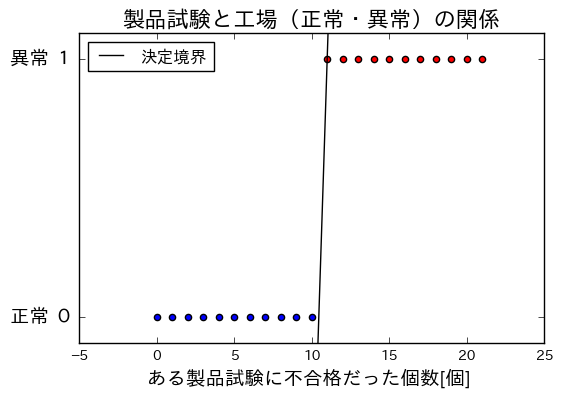

In [59]:
ytick = np.array(['正常 ０', '異常 １'])#目盛りのラベルの名前を指定（文字列）
plt.yticks([0, 1], ytick, fontsize=14)
plt.ylim([-0.1, 1.1]) # y軸の幅
plt.xlabel('ある製品試験に不合格だった個数[個] ',fontsize=14) #x軸のラベル
plt.title('製品試験と工場（正常・異常）の関係', fontsize=16) #グラフのタイトル
plt.scatter(X[:11], y[:11], c='b') #散布図
plt.scatter(X[11:], y[11:], c='r') #散布図
plt.plot(X, h4, c='black', label='決定境界') #決定境界
plt.legend(loc='upper left')
plt.show()

この決定境界は工場の異常と正常を分ける場所に引かれています。これはまさに我々が求めたかった境界線です。
つまり、ロジスティック回帰で求められる**決定境界**が分類の境界線になることが分かります。

## おつかれさまでした

以上でロジスティック回帰の基礎おしまいです。

離散値を使った教師あり学習の一つの手法であるロジスティック回帰を体験してもらいました。

最後に本演習で行なったことを簡単に振り返ります。

* パラメータの初期化
* 仮説を定義
* 目的関数
* 最急降下法

主に上記の4つのテクニックや手法を用いて機械学習の実装をおこないました。

基本的に線形回帰とやっていることは同じでした。違ったのは、仮説のみです！！

次の演習ではまた違ったテクニックを使ってロジスティック回帰の実装を行います。

おつかれさまでした。

最後にオプションとして、

* 学習回数に伴う決定境界の変遷
* 明らかに異常なデータを加えたデータを使った予測

それぞれロジスティック回帰で行ったコードを用意しています。

計算に少し時間がかかりますが、これまでの課題に正解していたら実行できるはずなのでセルを実行してみてください。

---

## オプション1

ロジスティック回帰で実装した同じデータセットを使って、学習回数の増加に伴う仮説の予測のプロットの推移を表示させてみます。

下のセルを実行すると計算がはじまります。

ただし、これまでの課題に正解している必要があります。

In [ ]:
iterations = np.array([1,100,500,1000, 10000,100000]) #学習回数
plt.figure(figsize=(18,10))
for i in range(6):
    theta = np.zeros([2,1])
    theta = gradientDescent_logi(X, y, theta, iterations[i])
    h5 = hypothesis(X, theta)
    h6 = sigmoid(X, theta)
    
    plt.subplot(2,3,i+1)
    plt.title("学習回数{}".format(iterations[i]))#タイトル
    plt.xlabel('ある製品試験に不合格だった個数[個]') #x軸のラベル
    plt.ylim([-0.2,1.2]) #y軸の幅
    ytick = np.array(['正常 ０', '異常 １'])#y軸のラベル
    plt.yticks([0,1] ,ytick, fontsize=14)#y軸のラベル
    plt.scatter(X[:11] ,y[:11], c='b') #データセットをプロット
    plt.scatter(X[11:] ,y[11:], c='r') #データセットをプロット
    plt.plot(X,h5,label='決定境界') #決定境界
    plt.scatter(X, h6,c='black') #シグモイド関数の出力
    plt.legend(loc='upper left') #凡例を表示
plt.show()

学習を繰り替えすごとに徐々にフィットしていく様子でした。

## オプション2

線形回帰では予測することができなかった明らかな異常なデータを加えてみます。
 
下のセルを実行してください。データの数を22個から30,50,100,150,200個と徐々に増やしてみます。

計算には数秒かかります。

In [ ]:
iterations = np.array([10000,10000,10000,50000,50000,50000]) #学習回数
m = np.array([22,30,50,100,150,200]) #製品の数
plt.figure(figsize=(18,10))
for q in range(6):
    XX = np.arange(0 , m[q], 1)
    yy = np.where(XX > XX[10], 1,0)
    for i in range(1):
        theta = np.zeros([2,1])
        theta = gradientDescent_logi(XX, yy, theta, iterations[q])
        h7 = hypothesis(XX, theta)
        h8 = sigmoid(XX, theta)
    
        plt.subplot(2,3,q+1)
        plt.title("データの数：{},　学習回数：{}".format(m[q],iterations[q]))
        plt.xlabel('ある製品試験に不合格だった個数[個]')
        ytick = np.array(['正常 ０', '異常 １'])
        plt.ylim([-0.2,1.2])
        plt.yticks([0,1] ,ytick, fontsize=14)
        plt.scatter(XX[:11] ,yy[:11], c='b')
        plt.scatter(XX[11:] ,yy[11:], c='r')
        plt.plot(XX,h7,label='決定境界')
        plt.scatter(XX, h8,c='black')
        plt.legend(loc='lower right')
plt.show()

明らかに異常な訓練データが追加されても正しく正常と異常を分類することができていることがわかります。